# SENTIMENT ANALYSIS OF TWEETS ABOUT BRANDS AND PRODUCTS

>Sentiment analysis of tweets about Google and Apple and their products.

<div style="display: flex; justify-content: center; gap: 20px;">
  <img src="google.jpg" alt="Google Logo" width="200">
  <img src="apple.png" alt="Apple Logo" width="200">
  <img src="android.jpg" alt="Apple Logo" width="300">
    
</div>


# Project Summary

>This project focuses on building a text classification model that classifies tweets into categories such as positive, negative or neutral about Google, Apple and Android and their products. This would help these companies understand how customers feel about their products, services or brand and through this information they can Improve products and services, monitor brand reputation and detect potential PR issues early.

# 1. Business Understanding

>Google is a global technology company founded in 1998 by Larry Page and Sergey Brin, best known for its search engine that organizes and provides access to the world’s information. Headquartered in Mountain View, California, Google is now a subsidiary of Alphabet Inc. Its products and services include Google Search, Gmail, YouTube, Android, Google Maps and Google Cloud.

>Apple Inc. is an American technology company founded in 1976 by Steve Jobs, Steve Wozniak, and Ronald Wayne, headquartered in Cupertino, California. It is renowned for designing and manufacturing innovative consumer electronics, software, and online services. Apple’s flagship products include the iPhone, iPad, Mac, Apple Watch and AirPods, along with software like iOS, macOS and iCloud services.

>Android is an open-source mobile operating system developed by Google, designed primarily for touchscreen devices such as smartphones and tablets. Based on a modified version of the Linux kernel, Android offers a customizable and flexible platform that supports millions of apps through the Google Play Store.

##  Business Problem


>In today’s competitive digital marketplace, companies like Google and Apple rely heavily on public perception to maintain brand loyalty and market growth. With millions of users expressing their opinions daily on social media platforms like Twitter, it becomes increasingly challenging for companies to manually analyze and understand the sentiment behind these vast amounts of data. Sentiment analysis helps determine the type or nature of sentiment expressed in these platforms. By automating sentiment detection, companies can gain real-time insights into customer opinions, improve their products, and make data-driven marketing and business decisions.



## Objectives


>- To build a text classification model that classifies tweets into categories such as positive, negative or no emotion.
>- To preprocess the tweet data by cleaning, tokenizing and transforming text into a machine-readable format.
>- To evaluate model performance using appropriate metrics such as accuracy and precision to ensure reliability.


## Metrics of Success

>- The model's performance will be evaluated using accuracy as the primary metric with a target accuracy of about 80%.

# 2. Data Understanding

> The Brands and Product Emotions dataset is from a cloud-native data catalog and metadata platform, data.world. The dataset contains sentiment from Human raters in over 9,000 Tweets as positive, negative, or neither. The dataset contains 9093 rows and 3 columns.

## features

>- `tweet_text` - The actual text from tweets
>- `emotion_in_tweet_is_directed_at` - The brand or product the tweet is about
>- `is_there_an_emotion_directed_at_a_brand_or_product` - Nature of sentiment


## Data limitations

>- Temporal relevance - The sentiments captured may be tied to specific events or time periods, reducing the dataset’s relevance for future analysis.
>- Incomplete Data - Although the dataset contains around 9,000 rows, only about 3,000 entries in brand/product column have text. This significantly reduces the usable data and may limit the model’s ability to learn diverse patterns.

## 2.1 Loading the Dataset

In [1]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
import re
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, pos_tag
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
tweet_df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')
tweet_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
# shape of dataset
print("Rows: ", tweet_df.shape[0])
print("Columns: ", tweet_df.shape[1])


Rows:  9093
Columns:  3


## 2.2 Information about the dataset

In [4]:
# dataset information
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


## 2.3 Checking for missing values

In [5]:
# checking for null values
print("The dataset has", tweet_df.isna().sum().sum(), "missing values")

The dataset has 5803 missing values


## 2.4 Checking for duplicates

In [6]:
print("The dataset has", tweet_df['tweet_text'].duplicated().sum(), "duplicates")

The dataset has 27 duplicates


# 3. Data Preparation

## 3.1 Handling missing values and duplicates

In [7]:
# checking distribution of null values
tweet_df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

Since we only have one empty row in 'tweet_text' column we drop the row

In [8]:
# dropping null values in 'tweet_text' column
tweet_df.dropna(subset=['tweet_text'], inplace=True)

In [9]:
tweet_df.isna().sum()

tweet_text                                               0
emotion_in_tweet_is_directed_at                       5801
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [10]:
# checking all the categories in 'emotion_in_tweet_is_directed_at' column 
tweet_df['emotion_in_tweet_is_directed_at'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

Since we have 5801 empty rows in 'emotion_in_tweet_is_directed_at' column If we drop all of them that could be half of our dataset gone meaning fewer examples for our model to learn from, so instead we replace the NaN with "Unknown" category.

In [11]:
# filling in the null values with 'Unknown' category
tweet_df['emotion_in_tweet_is_directed_at'].fillna('Unknown', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_17676\2951143570.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tweet_df['emotion_in_tweet_is_directed_at'].fillna('Unknown', inplace=True)


In [12]:
tweet_df['emotion_in_tweet_is_directed_at'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Unknown',
       'Android', 'Apple', 'Android App',
       'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [13]:
tweet_df.isna().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [14]:
# dropping the duplicate tweet texts
tweet_df = tweet_df.drop_duplicates(subset=['tweet_text'], keep='first')

In [15]:
print("The dataset has", tweet_df['tweet_text'].duplicated().sum(), "duplicates")

The dataset has 0 duplicates


## 3.3 Text Preprocessing

In [16]:
# reducing the categories into 3 
new_categories = {
    'iPad or iPhone App': 'Apple product or service',
    'iPad': 'Apple product or service',
    'iPhone': 'Apple product or service',
    'Apple': 'Apple product or service',
    'Other Apple product or service': 'Apple product or service',

    'Android': 'Google product or service',
    'Android App': 'Google product or service',
    'Google': 'Google product or service',
    'Other Google product or service': 'Google product or service'
    }

tweet_df['emotion_in_tweet_is_directed_at'] = tweet_df['emotion_in_tweet_is_directed_at'].map(new_categories)

In [17]:
tweet_df['emotion_in_tweet_is_directed_at'].unique()

array(['Apple product or service', 'Google product or service', nan],
      dtype=object)

In [18]:
tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5372
Positive emotion                      2968
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

In [19]:
# reducing the sentiment categories into 3
emotion = {
    'Positive emotion': 'Positive emotion',
    'Negative emotion': 'Negative emotion',
    'No emotion toward brand or product': 'Neutral or unclear sentiment',
    "I can't tell": 'Neutral or unclear sentiment'

    }

tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'] = tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'].map(emotion)

**Text preprocessing steps**
	                 	         
1. `Lowercasing`	        	
2. `Remove punctuation` 	       
3. `Tokenization`	         	
4. `Remove stopwords`	     	
5. `Lemmatization`	     	

In [20]:
# creating an instance of WordNetLemmatizer
lemmatizer =  WordNetLemmatizer()

# creating a list of stopwords in the english language
stopwords_list = stopwords.words('english')

In [21]:
# creating a function to perform the preprocessing
def preprocess(text, lemmatizer, stopwords_list):
    # lowercase the text
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)      # Remove URLs
    text = re.sub(r'@\w+', '', text)                # Remove mentions
    text = re.sub(r'#', '', text)                   # Remove hashtag symbol
    text = re.sub(r'\brt\b', '', text)              # Remove 'RT'
    text = re.sub(r'[^a-z0-9\s]', ' ', text)        # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()        # Clean extra spaces
    #using word_tokenize to tokenize the text
    text = word_tokenize(text)
    # remove stopwords
    text = [word for word in text if word not in stopwords_list]
    # lemmatize the text
    text = [lemmatizer.lemmatize(word) for word in text]
    # return the preprocessed text as single string
    return " ".join(text)
    

In [22]:
# testing our function on a small sample
sample = 'Spin Play iPad launch Party. Hanging with @mention and @mention #sxsw (@mention Cedar Street Courtyard) {link}'
preprocess(sample, lemmatizer, stopwords_list)

'spin play ipad launch party hanging sxsw cedar street courtyard link'

In [23]:
# preprocessing our tweet text and creating a new column for the cleaned text
tweet_df['cleaned_text'] = tweet_df['tweet_text'].apply(lambda x: preprocess(x, lemmatizer, stopwords_list))

In [24]:
tweet_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple product or service,Negative emotion,3g iphone 3 hr tweeting rise austin dead need ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple product or service,Positive emotion,know awesome ipad iphone app likely appreciate...
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple product or service,Positive emotion,wait ipad 2 also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,Apple product or service,Negative emotion,hope year festival crashy year iphone app sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google product or service,Positive emotion,great stuff fri sxsw marissa mayer google tim ...


# 3. EDA

## Univariate

C:\Users\user\AppData\Local\Temp\ipykernel_17676\271684432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = tweet_df, x = 'is_there_an_emotion_directed_at_a_brand_or_product', order = tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().index, palette = "inferno")


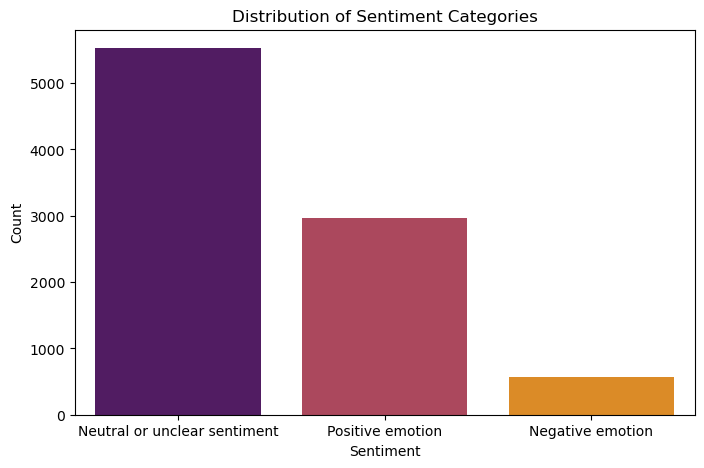

In [25]:
# Data visualization of target variable
plt.figure(figsize = (8, 5))
sns.countplot(data = tweet_df, x = 'is_there_an_emotion_directed_at_a_brand_or_product', order = tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().index, palette = "inferno")
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Neutral or unclear sentiment dominates our data and positive sentiment is more than negative sentiment meaning there is class imbalance.


In [26]:
# finding length of each tweet
tweet_df['text_length'] =tweet_df['cleaned_text'].str.len()
# finding length of each word
tweet_df['word_count'] = tweet_df['cleaned_text'].str.split().str.len()

# text statistics
print("Average text length:", tweet_df['text_length'].mean(), "characters")
print("Average word count:", tweet_df['word_count'].mean(), "words")
print("Longest text:", tweet_df['text_length'].max(), "characters")
print("Shortest text:", tweet_df['text_length'].min(), "characters")

Average text length: 68.89453943739657 characters
Average word count: 11.440375068946498 words
Longest text: 131 characters
Shortest text: 0 characters


C:\Users\user\AppData\Local\Temp\ipykernel_17676\3355942109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = tweet_df, x = 'emotion_in_tweet_is_directed_at', order = tweet_df['emotion_in_tweet_is_directed_at'].value_counts().index, palette = 'Set2')


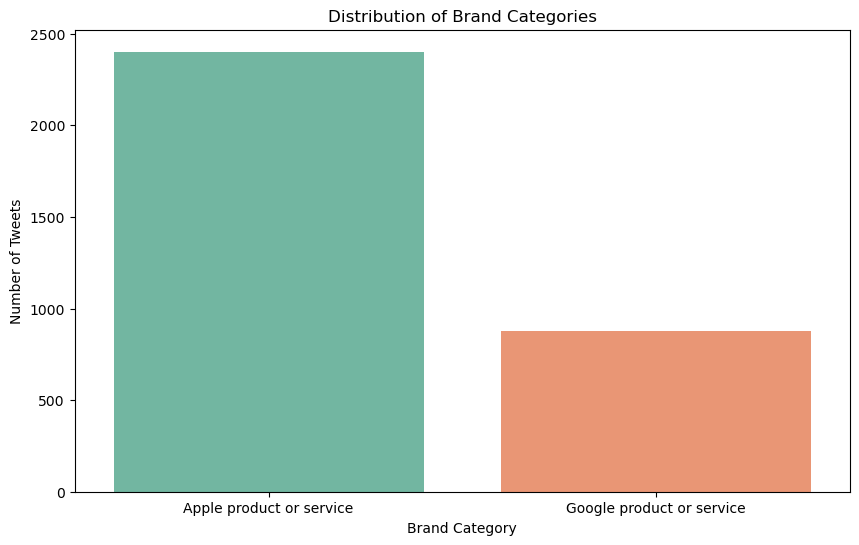

In [27]:
# Brand category distribution
plt.figure(figsize = (10, 6))
sns.countplot(data = tweet_df, x = 'emotion_in_tweet_is_directed_at', order = tweet_df['emotion_in_tweet_is_directed_at'].value_counts().index, palette = 'Set2')
plt.title('Distribution of Brand Categories')
plt.xlabel('Brand Category')
plt.ylabel('Number of Tweets')
plt.show()

Most tweets are not directed towards Apple and Google but Apple leads Google in the number of tweets.

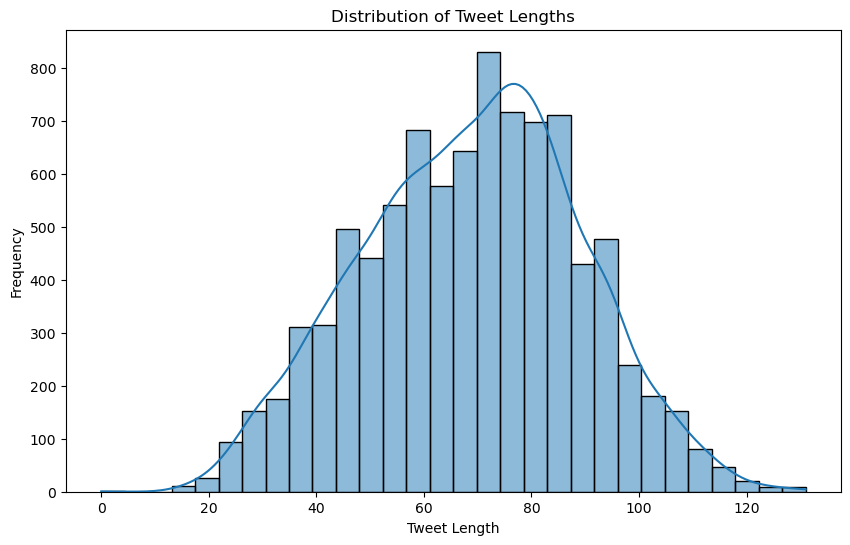

In [28]:
# Tweet length distribution
plt.figure(figsize = (10, 6))
sns.histplot(tweet_df['text_length'], bins = 30, kde = True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

Distribution of tweets is normally distributed as most tweets have a moderate length

## Bivariate

C:\Users\user\AppData\Local\Temp\ipykernel_17676\2673826122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tweet_df, x='is_there_an_emotion_directed_at_a_brand_or_product', y='word_count', palette='Set2')


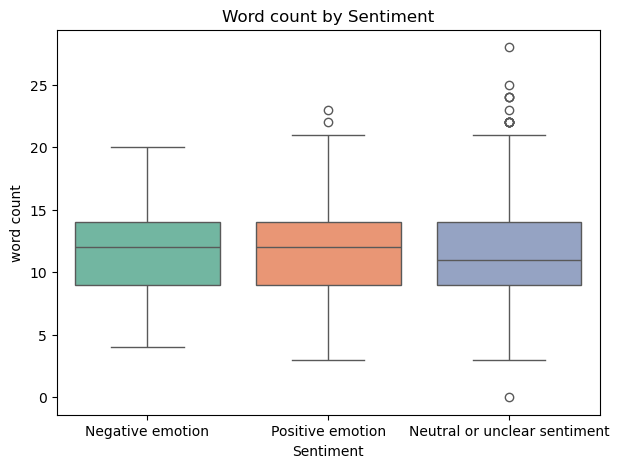

In [29]:
# word count by sentiment
plt.figure(figsize=(7,5))
sns.boxplot(data=tweet_df, x='is_there_an_emotion_directed_at_a_brand_or_product', y='word_count', palette='Set2')
plt.title("Word count by Sentiment")
plt.xlabel('Sentiment')
plt.ylabel('word count')
plt.show()


Overall similarity in median lengths suggests that tweet length doesn’t differ drastically by sentiment though neutral tweets have more variability.

C:\Users\user\AppData\Local\Temp\ipykernel_17676\1082808328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = tweet_df, x = 'emotion_in_tweet_is_directed_at', y = 'word_count', palette = 'Set1')


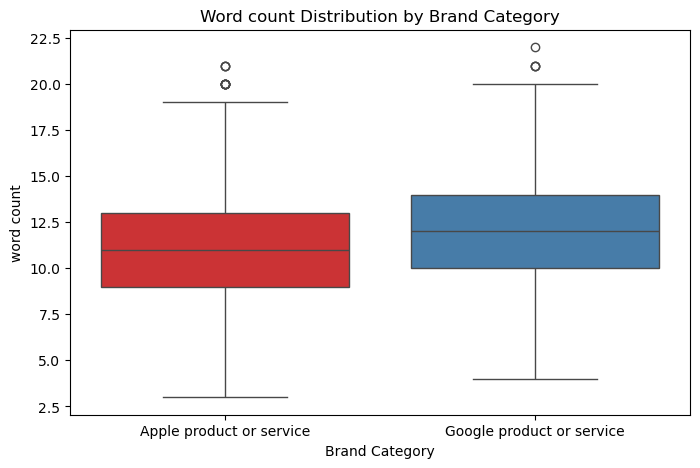

In [30]:
# Word count by Brand Category
plt.figure(figsize = (8,5))
sns.boxplot(data = tweet_df, x = 'emotion_in_tweet_is_directed_at', y = 'word_count', palette = 'Set1')
plt.title('Word count Distribution by Brand Category')
plt.xlabel('Brand Category')
plt.ylabel('word count')
plt.show()

Tweets mentioning Google products tend to be slightly longer on average, with a median around 12 words.

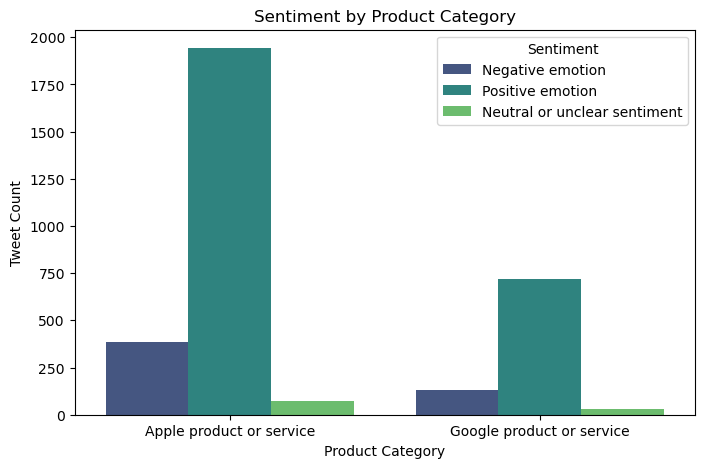

In [31]:
# tweet length by sentiment
plt.figure(figsize=(8,5))
sns.countplot(data=tweet_df, x='emotion_in_tweet_is_directed_at', hue='is_there_an_emotion_directed_at_a_brand_or_product', palette='viridis')
plt.title("Sentiment by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Tweet Count")
plt.legend(title="Sentiment")
plt.show()


Apple has a higher count of positive tweets compared to Google.

## Multivariate

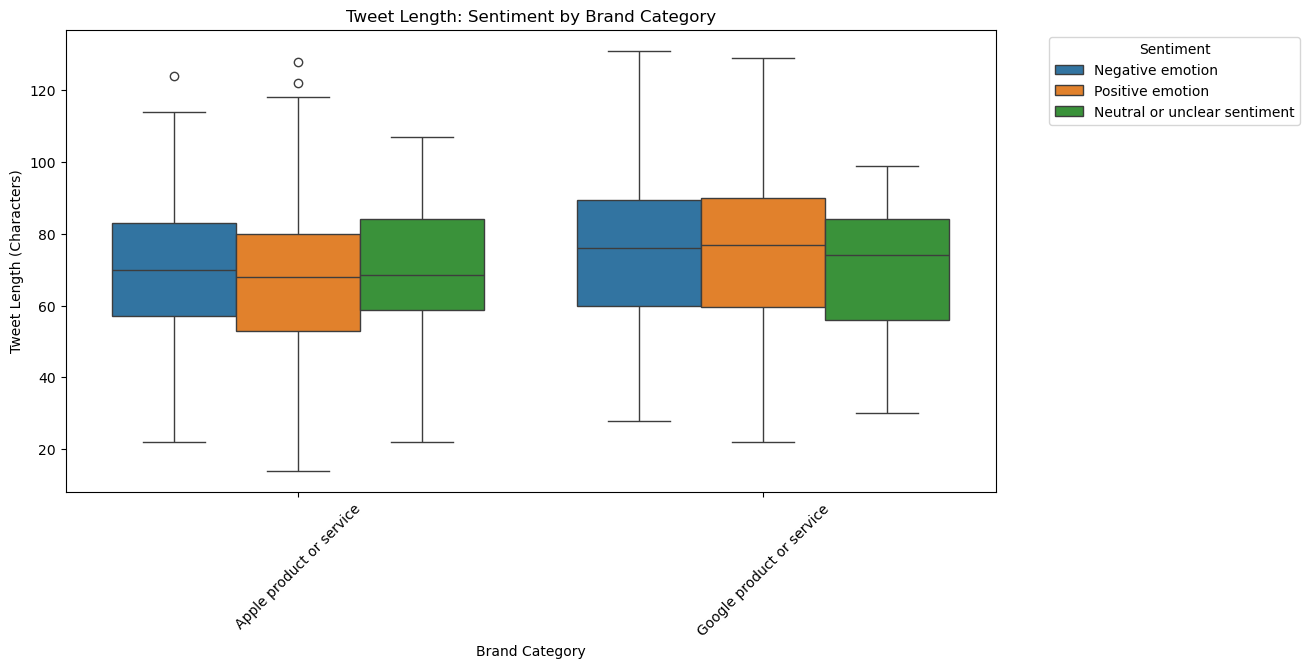

In [32]:
plt.figure(figsize = (12, 6))
sns.boxplot(data=tweet_df, x='emotion_in_tweet_is_directed_at', y='text_length', hue='is_there_an_emotion_directed_at_a_brand_or_product')
plt.title('Tweet Length: Sentiment by Brand Category')
plt.xlabel('Brand Category')
plt.ylabel('Tweet Length (Characters)')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Positive tweets about Apple tend to be slightly longer than negative or neutral ones. Google tweets show a similar pattern, but differences are minor.

# 4. Feature Engineering

## Frequency Distributions

Now that we've done some basic cleaning and tokenization, let's go ahead and create a `Frequency Distribution`to see the number of times each word is used.

In [33]:
# combining all the words into one big list
all_words = " ".join(tweet_df['cleaned_text']).split()

In [34]:
# counting how often each word appears
all_words_freqdist = FreqDist(all_words)
all_words_freqdist.most_common(20)

[('sxsw', 9605),
 ('link', 4305),
 ('google', 2650),
 ('ipad', 2522),
 ('apple', 2336),
 ('quot', 1696),
 ('iphone', 1586),
 ('store', 1528),
 ('2', 1226),
 ('new', 1084),
 ('austin', 973),
 ('amp', 827),
 ('app', 824),
 ('circle', 685),
 ('launch', 683),
 ('social', 663),
 ('pop', 599),
 ('android', 595),
 ('today', 577),
 ('network', 468)]

Some words like 'sxsw', 'mention', 'link', 'rt', 'amp', 'quot' do not add meaning to our text so we add them to our stopwords list

In [35]:
# add custom meaningless tokens
custom_stopwords = {'sxsw', 'mention', 'link', 'rt', 'amp', 'quot'}

# merge them
stopwords_list.extend(custom_stopwords)

In [36]:
# we rerun the function
tweet_df['cleaned_text'] = tweet_df['tweet_text'].apply(lambda x: preprocess(x, lemmatizer, stopwords_list))

In [37]:
# combining all the words into one big list
all_words = " ".join(tweet_df['cleaned_text']).split()

In [38]:
all_words_freqdist = FreqDist(all_words)
all_words_freqdist.most_common(20)

[('google', 2650),
 ('ipad', 2522),
 ('apple', 2336),
 ('iphone', 1586),
 ('store', 1528),
 ('2', 1226),
 ('new', 1084),
 ('austin', 973),
 ('app', 824),
 ('circle', 685),
 ('launch', 683),
 ('social', 663),
 ('pop', 599),
 ('android', 595),
 ('today', 577),
 ('network', 468),
 ('ipad2', 464),
 ('get', 457),
 ('line', 450),
 ('via', 436)]

google, ipad, iphone and apple are the most used which is now what we wanted

In [39]:
# reducing the sentiment categories to only 2
tweet_df = tweet_df[tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Positive emotion', 'Negative emotion'])]


In [40]:
tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
Positive emotion    2968
Negative emotion     569
Name: count, dtype: int64

In [41]:
# extracting adjectives and adverbs to create a new feature
def extract_adj_adv(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    
    # Keep adjectives (JJ) and adverbs (RB)
    filtered = [word for word, tag in tagged if tag.startswith('JJ') or tag.startswith('RB')]
    return ' '.join(filtered)


In [42]:
# testing the function on a small sample
sample = "The phone is incredibly fast and the design is stunning but the battery life is disappointing."
print(extract_adj_adv(sample))

incredibly fast disappointing


In [43]:
# creating the new feature by applying the function
tweet_df['adj_adv_text'] =tweet_df['cleaned_text'].apply(extract_adj_adv)

## TF-IDF Vectorization with N-grams

A way of turning text which is words, tweets etc. into numbers so that machine-learning models can understand them.

In [44]:

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(
    ngram_range=(1, 3),      # unigrams + bigrams + trigrams
    max_df=0.8,              # ignore words appearing in >90% of tweets
    min_df=0.01,             # ignore words appearing in <1% of tweets
    stop_words='english'     # remove stopwords
)

# Fit and transform
X_tfidf = tfidf.fit_transform(tweet_df['cleaned_text'])

vectorizer_adjadv = TfidfVectorizer(max_df=0.9, min_df=3)

# Fit and transform
X_adjadv = vectorizer_adjadv.fit_transform(tweet_df['adj_adv_text'])


# Target variable
y = tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'] 

# Combine both
X_combined = hstack([X_tfidf, X_adjadv])

In [45]:
print("Number of features:", len(tfidf.get_feature_names_out()))
# Show first 20 features
print(tfidf.get_feature_names_out()[:20])  


Number of features: 166
['android' 'app' 'app store' 'apple' 'apple come' 'apple come cool'
 'apple opening' 'apple opening temporary' 'apple pop' 'apple pop store'
 'apple store' 'apple win' 'apps' 'austin' 'austin ipad'
 'austin ipad launch' 'away' 'awesome' 'begin' 'begin apple']


## Mutual Information Scores

Mutual Information helps us find which words or n-grams are most predictive of sentiment.

In [46]:

# Compute MI scores
mi_scores = mutual_info_classif(X_tfidf, y, discrete_features=True)

# Store results in a DataFrame
mi_df = pd.DataFrame({
    'Feature': tfidf.get_feature_names_out(),
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

# Show top 15 most predictive features
mi_df.head(15)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\user\an

,Feature,MI_Score
63,ipad,0.106711
3,apple,0.082812
69,iphone,0.078613
50,google,0.075427
133,store,0.045940
1,app,0.039669
100,new,0.031051
13,austin,0.026493
75,like,0.021812
10,apple store,0.021081


## Encoding our Target variable

In [47]:

# Initialize encoder
encoder = LabelEncoder()

# Fit encoder
encoder.fit(y)

# order of categories
custom_order = ['Negative emotion', 'Positive emotion']
encoder.classes_ = np.array(custom_order)

# Encode
y = encoder.transform(y)


In [48]:
# confirming the encoding results
for i, label in enumerate(encoder.classes_):
    print(f"{label} : {i}")


Negative emotion : 0
Positive emotion : 1


In [49]:
# splitting our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

In [50]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# 5.Modeling

**Base model** - `Logistic Regression`

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_res, y_train_res)

# predictions
y_pred = model.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.68      0.48       114
           1       0.93      0.77      0.84       594

    accuracy                           0.76       708
   macro avg       0.65      0.73      0.66       708
weighted avg       0.84      0.76      0.79       708



## Multinomial Naive Bayes

In [72]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_res, y_train_res)
y_pred_nb = nb.predict(X_test)


In [73]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.32      0.67      0.43       114
           1       0.92      0.73      0.81       594

    accuracy                           0.72       708
   macro avg       0.62      0.70      0.62       708
weighted avg       0.82      0.72      0.75       708



## Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# probability of positive class 
y_prob = rf.predict_proba(X_test)[:, 1] 
y_true = y_test

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = roc_auc_score(y_true, y_prob)
print(roc_auc)

0.8188315907614154


In [56]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.51      0.49      0.50       114
           1       0.90      0.91      0.91       594

    accuracy                           0.84       708
   macro avg       0.71      0.70      0.70       708
weighted avg       0.84      0.84      0.84       708



## Deep Learning

In [57]:
import tensorflow as tf

In [58]:
# our neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [59]:
# we then compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [60]:
model.evaluate(X_test, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2232 - loss: 0.7090


[0.7090426683425903, 0.22316384315490723]

In [61]:
model.fit(X_train_res, y_train_res, batch_size=32, epochs=200)

Epoch 1/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6569 - loss: 0.6683
Epoch 2/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7717 - loss: 0.5052
Epoch 3/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8227 - loss: 0.3954
Epoch 4/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8574 - loss: 0.3315
Epoch 5/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8812 - loss: 0.2863
Epoch 6/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9004 - loss: 0.2524
Epoch 7/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9181 - loss: 0.2201
Epoch 8/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9290 - loss: 0.1916
Epoch 9/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9358 - loss: 0.1695
Epoch 10/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9450 - loss: 0.1523
Epoch 11/200
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9480 - loss: 0.1363
Epoch 12/200
149/149 ━━━━━━━━━━━━━━━━━━━━

In [62]:
model.evaluate(X_test, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8362 - loss: 1.2937


[1.293676733970642, 0.8361582159996033]

In [63]:
y_pred_prob = model.predict(X_test)
y_pred_nn = (y_pred_prob > 0.5).astype("int32")


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [64]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.49      0.61      0.55       114
           1       0.92      0.88      0.90       594

    accuracy                           0.84       708
   macro avg       0.71      0.75      0.72       708
weighted avg       0.85      0.84      0.84       708



In [65]:
# neural network model 2

deeper_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    # Prevents overfitting
    tf.keras.layers.Dropout(0.3),  
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
# compiling the model
deeper_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [67]:
# using early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [68]:
# training our neural network model 
deeper_model.fit(X_train_res, y_train_res, batch_size=32, epochs=20)

Epoch 1/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6830 - loss: 0.6086
Epoch 2/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8241 - loss: 0.3944
Epoch 3/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8812 - loss: 0.2854
Epoch 4/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9149 - loss: 0.2124
Epoch 5/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9334 - loss: 0.1718
Epoch 6/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9429 - loss: 0.1413
Epoch 7/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9543 - loss: 0.1166
Epoch 8/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9610 - loss: 0.1026
Epoch 9/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9539 - loss: 0.1052
Epoch 10/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9608 - loss: 0.0969
Epoch 11/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9663 - loss: 0.0862
Epoch 12/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/st

In [69]:
y_pred_prob_2 = deeper_model.predict(X_test)
y_pred_nn_2 = (y_pred_prob_2 > 0.5).astype("int32")

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [70]:
print(classification_report(y_test, y_pred_nn_2))

              precision    recall  f1-score   support

           0       0.48      0.49      0.48       114
           1       0.90      0.90      0.90       594

    accuracy                           0.83       708
   macro avg       0.69      0.69      0.69       708
weighted avg       0.83      0.83      0.83       708



## 6. Evaluation

In [74]:
def Classification_report(y_true, y_pred):
    print(classification_report(y_true, y_pred))


print("LogisticRegressionClassifier Classification Report")
Classification_report(y_test, y_pred)

print("MultiNomialNaivebayes Classification Report")
Classification_report(y_test, y_pred_nb)

print("RandomForestClassifier Classification Report")
Classification_report(y_test, y_pred_rf)

print("Neural Network model Classification Report")
Classification_report(y_test, y_pred_nn))


LogisticRegressionClassifier Classification Report
              precision    recall  f1-score   support

           0       0.32      0.67      0.43       114
           1       0.92      0.73      0.81       594

    accuracy                           0.72       708
   macro avg       0.62      0.70      0.62       708
weighted avg       0.82      0.72      0.75       708

MultiNomialNaivebayes Classification Report
              precision    recall  f1-score   support

           0       0.32      0.67      0.43       114
           1       0.92      0.73      0.81       594

    accuracy                           0.72       708
   macro avg       0.62      0.70      0.62       708
weighted avg       0.82      0.72      0.75       708

RandomForestClassifier Classification Report
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       114
           1       0.90      0.91      0.91       594

    accuracy                           0.8